# Lecture 14 Feature Engineering <a id="section0"/>

- [14.1 Dimensionality Reduction](#section1)
    - [14.1.1 Principal Components Analysis (PCA)](#section2)
- [14.2 Hyperparameter Tuning](#section3)
    - [14.2.1 Grid Search](#section4)
    - [14.2.2 Random Search](#section5)
- [14.3 Cross-Validation](#section6)
    - [14.3.1 k-Fold Cross-Validation](#section7)
- [14.4 Performance Metrics](#section8)
- [References](#section9)

# 14.1 Dimensionality Reduction <a id="section1"/>

***Feature engineering*** refers to a process of selecting, manipulating, and transforming the features in a dataset into a new set of features to leverage the training and predicting steps with a machine learning model. 

In the previous lecture we studied approaches for manipulating and preprocessing data through scaling numerical features and encoding categorical features, as well as, via applying exploratory data analysis for handling missing values, visualizing the data distribution and correlation, removing duplicates, and selecting relevant features in data.

In this lecture, we will study approaches for feature engineering based on projecting input features into a lower-dimensional space with dimensionality reduction. Differently from the techniques based on selecting input features that are available in the raw data, these techniques produce new features that are not available in the original dataset. One of the most commonly used techniques for this purpose is Principal Component Analysis.

## 14.1.1 Principal Components Analysis (PCA) <a id="section2"/>

***Principal Component Analysis (PCA)*** is an unsupervised method for reducing the dimensionality of datasets. Because of the dimensionality reduction ability, PCA is often used to create new features that emphasize relevant information and remove redundant information in data. In addition, the application of dimensionality reduction typically increases the training speed of machine learning models. Because PCA belongs to the category of unsupervised learning algorithms, it does not need data labels or other information. 

Let's explain how PCA works with the following simple dataset consisting of 200 data points with only two dimensions (`x` and `y` coordinates).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

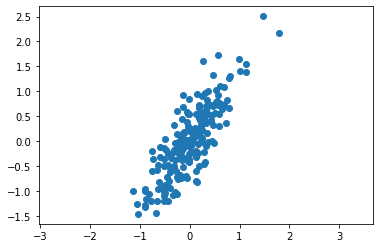

In [2]:
# create randomly distributed data points and plot the data
np.random.seed(2)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

PCA applies a decomposition operation (e.g., Singular Value Decomposition) to calculate the eigenvectors and eigenvalues of the data. The eigenvectors represent the ***principal components*** in the data, and the eigenvalues represent the level of importance of the principal components in describing the data distribution, referred to as ***explained variance***. 

In scikit-learn, PCA is applied by simply calling the method `fit()` with a PCA object with the data as argument. The argument `n_components` is the number of principal components, which we assign to 2 in this case, because the data is two-dimensional.

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The attribute `components_` below is a numpy array consisting of the two principal components of the data, that is, these are the vectors of the directions of maximum variance in the data. As we mentioned, the principal components correspond to the *eigenvectors* of the data. 

In [4]:
print(pca.components_)

[[ 0.51517079  0.85708754]
 [-0.85708754  0.51517079]]


The attribute `explained_variance_` is the amount of the variance in the dataset that is explained by each of the two principal components. The explained variance in this case is `[0.6766, 0.00531]`. These numbers correspond to the *eigenvalues* of the data. Also, the `explained_variance_ratio_` attribute below shows the percentage, meaning that about 92.72% of the dataset variance lies along the first principal axis, and the remaining 7.28% lies on the second principal axis. 

In [5]:
print(pca.explained_variance_)

[0.67663501 0.05315297]


In [6]:
print(pca.explained_variance_ratio_)

[0.92716656 0.07283344]


To visualize the principal components and explained variance, let's view them as vectors plotted on top of the data, shown in the graph below. The principal components are also called principal axes, and are shown with the black lines in the graph. We can understand PCA as finding new axes along which the variance of the data is maximized. Notice in the plot that one vector is longer than the other, thus, this means that one direction in the data is more "important" than the other direction. The `explained variance` quantifies this measure of "importance" in both directions, and it corresponds to the length of the two axes shown in the graph. 

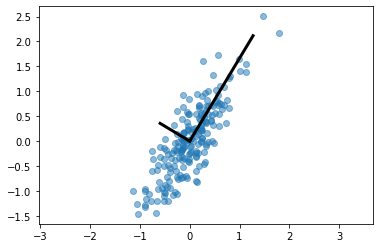

In [7]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

### PCA Example

Next, let's apply PCA for reducing the dimensionality of a more realistic dataset, i.e., the `wine` dataset described in the next cells.

In [8]:
from sklearn.datasets import load_wine
wine = load_wine()

# Features
X = wine.data 

# Target labels
y = wine.target

Print the shapes of the data. There are 178 samples, each having 13 features. 

In [9]:
print(X.shape)
print(y.shape)

(178, 13)
(178,)


Print the feature names and target names. 

In [10]:
# Features names
feat_names = wine.feature_names
feat_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [11]:
# Target names - there are 3 classes
target_names = wine.target_names
target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [13]:
print('Training data inputs', X_train.shape)
print('Training labels', y_train.shape)
print('Testing data inputs', X_test.shape)
print('Testing labels', y_test.shape)

Training data inputs (124, 13)
Training labels (124,)
Testing data inputs (54, 13)
Testing labels (54,)


Let's first scale the input data with `StandardScaler`. 

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now, let's apply PCA to the dataset. We can see below the explained variance ratio for all 13 principal components listed in descending order (e.g., the first component explains 36.9%, etc.).

In [15]:
from sklearn.decomposition import PCA

pca = PCA()

X_reduced = pca.fit_transform(X_train_scaled)

In [16]:
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

We can also plot the explained variance ratio, as well as the cumulative explained variance ratio. In the cumulative plot (the upper line), we can see that the first two principal components explain about 55% of the data variance.

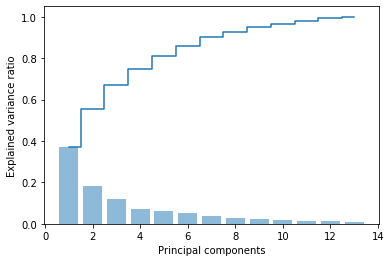

In [17]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

Next, let's project the data into a 2-dimensional space using only the first two principal components.

In [18]:
pca_2 = PCA(n_components=2)

X_train_2dim = pca_2.fit_transform(X_train_scaled)
X_test_2dim = pca_2.transform(X_test_scaled)

Note that the number of features was reduced from the original 13 features to 2 features.

In [19]:
print(X_train_2dim.shape)
print(X_test_2dim.shape)

(124, 2)
(54, 2)


And now, we can train a Logistic Regression classifier using only the first two principal components of the data.

In [20]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train_2dim, y_train)

accuracy = lr_model.score(X_test_2dim, y_test)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

The test accuracy is 92.59 %


### Choosing the Number of Principal Components

When using PCA, we need to select the number of principal components that will retain as much information as possible. One way to choose this number is based on the cumulative variance ratio, as in the next plot. For instance, the first 4 principal components will retain about 84% of the data variance.

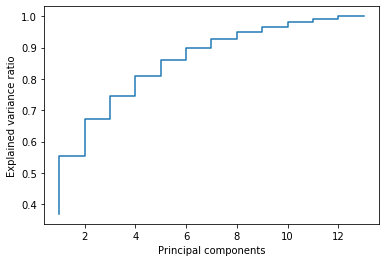

In [21]:
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

An alternative is instead of passing the number of components as the argument to the PCA object, to pass the preferred explained variance ratio. For instance, let's calculate the number of principal components that explain 96% of the data variance. 

In [22]:
# Finding the number of components from desired explained variance ratio
pca_3 = PCA(n_components=0.96)

X_reduced = pca_3.fit_transform(X_train_scaled)

To find the number of components, use `pca_3.n_components_`. The answer is 10 principal components.

In [23]:
pca_3.n_components_

10

The explained variance ratio should be approximately `0.96`.

In [24]:
np.sum(pca_3.explained_variance_ratio_)

0.9662714406558743

### PCA for Visualizing Handwritten Digits

PCA can also be used to visualize high-dimensional datasets. Let's try to visualize the handwritten digits dataset, consisting of 8x8 pixels images (64 dimensions). We will use PCA to project those 64 dimensions into 2 dimensions (principal components) to visualize the data. 

In [25]:
from sklearn.datasets import load_digits

digits = load_digits()

# features
X = digits.data

# target
y = digits.target

print(X.shape)

(1797, 64)


In [26]:
# project from 64 to 2 dimensions
pca_2dim = PCA(2)  

Xproj = pca_2dim.fit_transform(X)

# shape of projected features
print(Xproj.shape)

(1797, 2)


The scatterplot of the projected two-dimensional data is shown below. We can notice that the 10 digits have formed clusters in two dimensions, however, there is overlap between the different categories. E.g., note overlaps between digits 1 and 7, 3 and 8, etc.

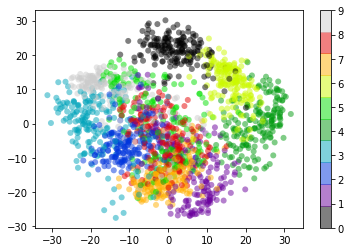

In [27]:
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

PCA can also be considered a data compression technique, since using a small number of principal components `n_components` allows us to represent a high-dimensional data point with a low-dimensional representation. 

And PCA can also be used as a filtering approach for noisy data. This works because any principal components with variance much larger than the effect of the noise should be relatively unaffected by the noise. Keeping only a subset of principal components allows to retain information in the true signal and throw out the noise.

### Other Dimensionality Reducing Techniques

The main weakness of PCA is that can be affected by outliers in the data. For this reason, robust variants of PCA have been developed (such as RandomizedPCA, SparsePCA), which iteratively discard data points that are poorly described by the principal components.

Other unsupervised dimensionality reduction techniques that are offered in scikit-learn include:

- RandomizedPCA: fast approximate PCA implementation based on a randomized algorithm (sklearn.decomposition.RandomizedPCA).
- SparsePCA: PCA variant including L1 penalty for sparsity (sklearn.decomposition.SparsePCA).
- KernelPCA: non-linear PCA variant through the use of kernels ((sklearn.decomposition.KernelPCA).
- FastICA: Independent Component Analysis (sklearn.decomposition.FastICA).
- NMF: non-negative matrix factorization (sklearn.decomposition.NMF).
- LocallyLinearEmbedding: nonlinear manifold learning technique based on local neighborhood geometry (sklearn.manifold.LocallyLinearEmbedding).
- IsoMap: nonlinear manifold learning technique based on a sparse graph algorithm (sklearn.manifold.IsoMap). 

# 14.2 Hyperparameter Tuning <a id="section3"/>

During model training, the ***parameters (weights)*** of the model are updated in an iterative process. 

***Hyperparameters*** (tuning parameters) are a set of parameters that control the complexity of the model. For instance, in k-Nearest Neighbors, the number of nearest neighbors is a hyperparameter of the model. Unlike the model parameters that are learned during training, hyperparameters are selected (i.e., tuned) by the user. While models such as kNN have only one or two hyperparameters, other models such as deep neural networks can have many.

***Hyperparameter tuning*** is the process of screening hyperparameter values (or combinations of hyperparameter values) to find a model that generalizes well to unseen data. The performance of some models (e.g., deep neural networks) can significantly depend on the value of hyperparameters.

For instance, to find a suitable value for the number of nearest neighbors in kNN, we can write a for-loop to train the kNN model multiple times and evaluate the performance when the number of nearest neighbors varies from 5 to 12, as in the next cell. We can see that the best performance is achieved for 8 and 10 neighbors. 

In [28]:
from sklearn.neighbors import KNeighborsClassifier

for n_neighbors in range(5, 12):
    knn_model = KNeighborsClassifier(n_neighbors)
    
    knn_model.fit(X_train_2dim, y_train)

    accuracy = knn_model.score(X_test_2dim, y_test)
    print('Number of neighbors is {0:}, the test accuracy is {1:5.2f} %'.format(n_neighbors, accuracy*100))

Number of neighbors is 5, the test accuracy is 92.59 %
Number of neighbors is 6, the test accuracy is 94.44 %
Number of neighbors is 7, the test accuracy is 92.59 %
Number of neighbors is 8, the test accuracy is 96.30 %
Number of neighbors is 9, the test accuracy is 94.44 %
Number of neighbors is 10, the test accuracy is 96.30 %
Number of neighbors is 11, the test accuracy is 92.59 %


## 14.2.1 Grid Search <a id="section4"/>

Scikit-learn offers the function `GridSearchCV()` for hyperparameter tuning, which searches through  different values of hyperparameters to find the best combination of values based on a used performance metric. 

When there are several hyperparameters to tune, doing it manually can take time and resources, and functions like GridSearchCV can help to automate the tuning of hyperparameters.

In the cell below, we can see that GridSearchCV takes as arguments the model, a grid of hyperparameter values, and a scoring function (in this case `accuracy`). It will loop through the predefined values for the hyperparameters in the grid and fit the model for each predefined value. Based on the scoring function, it will find the best values from the listed hyperparameters.

In [29]:
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()

# Create grid of hyperparameter values
hyper_grid = {'n_neighbors': [5, 10, 15, 20]}

# Tune a knn model using grid search
grid_search = GridSearchCV(knn_model, hyper_grid, scoring='accuracy')
results = grid_search.fit(X_train_2dim, y_train)

The best accuracy score and best value of the hyperparameters are attributes of the `results` from the grid search.

In [30]:
results.best_score_

0.967741935483871

In [31]:
results.best_params_

{'n_neighbors': 10}

One more example is shown below, where Support Vector Machines Classifier is used with the same dataset, and grid search is performed over two hyperparameters: C is a regularization value, and the kernel type. The function searches over all combinations of the two hyperparameters, and the best accuracy is achieved for `C=0.1` and `kernel='linear'`.

In [32]:
from sklearn.svm import SVC

svc_model = SVC()

hyper_grid = {'C': [0.01, 0.1, 1.0, 10.0, 100.0], 
               'kernel': ['linear', 'rbf', 'poly']}

grid_search = GridSearchCV(svc_model, hyper_grid, scoring='accuracy')
results = grid_search.fit(X_train_2dim, y_train)

print('Accuracy:',results.best_score_)
print('Hyperparameters:', results.best_params_)

Accuracy: 0.9758064516129032
Hyperparameters: {'C': 0.1, 'kernel': 'linear'}


In [33]:
accuracy = grid_search.score(X_test_2dim, y_test)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

The test accuracy is 92.59 %


## 14.2.2 Random Search <a id="section5"/>

However, a Cartesian grid search approach has limitations, because it does not scale well when the number of hyperparameters to tune is high. ***Random search*** based on hyperparameter distributions is another approach for hyperparameter tuning which has often demonstrated better performance than grid search. 

<img src="images/grid_search.png" alt="Drawing" style="width: 500px;"/>

An example of using Random Search with the SVM classifier is shown next. Unlike the grid search, in this case, the distribution of the hyperparameter C is specified, as a uniform distribution with values between 0.01 and 100. Also, in the `RandomizedSearchCV` we need to provide the number of samples for the hyperparameter from the distribution via the `n_iter` argument. 

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

svc_model = SVC()

# specify hyperparameter distributions to randomly sample from
hyper_distributions = {'C': uniform(0.01, 100)}

random_search = RandomizedSearchCV(svc_model, hyper_distributions, n_iter=40, scoring='accuracy')
results = random_search.fit(X_train_2dim, y_train)

print('Accuracy:',results.best_score_)
print('Hyperparameters:', results.best_params_)

Accuracy: 0.9758064516129032
Hyperparameters: {'C': 1.1117920677807935}


In [35]:
accuracy = random_search.score(X_test_2dim, y_test)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

The test accuracy is 92.59 %


One more example is shown with a Random Forest classifier. Random forests can have several hyperparameters, and here we considered the number of trees in the forest `n_estimators`, maximum depth of the trees `max_depth`, and the minimum number of samples required in a leaf node `min_samples_leaf`. These hyperparameters are sampled from a uniform distribution of integers, with the ranges of values defined for each hyperparameter. For this case, a standard grid search would be more computationally expensive.

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=123)

# specify hyperparameter distributions to randomly sample from
hyper_distributions = {
    'n_estimators': randint(20, 100),
    'max_depth': randint(4, 20),
    'min_samples_leaf': randint(1, 100),
}

random_search_2 = RandomizedSearchCV(rf_model, hyper_distributions, n_iter=20, scoring='accuracy')
results = random_search_2.fit(X_train_2dim, y_train)

print('Accuracy:',results.best_score_)
print('Hyperparameters:', results.best_params_)

Accuracy: 0.967741935483871
Hyperparameters: {'max_depth': 13, 'min_samples_leaf': 18, 'n_estimators': 62}


In [37]:
accuracy = random_search_2.score(X_test_2dim, y_test)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

The test accuracy is 92.59 %


# 14.3 Cross-Validation <a id="section6"/>

So far, we adopted a strategy to split our data into training and testing sets, and we assessed the performance of our model on the test set. Unfortunately, there are a few pitfalls to this approach:
1. If our dataset is small, a single test set may not provide an adequate measure of the model's performance on unseen data.
2. A single test set does not provide any insight regarding the variability of the model's performance.

An alternative strategy is to use a resampling method, where we can repeatedly fit a model to parts of the  training data and test its performance on other parts of the training data. This allows us to train and validate our model entirely on the training data and not touch the test data until we have selected a final "optimal" model. The two most commonly used resampling methods include ***k-fold cross-validation*** and 
***bootstrap sampling***. This section focuses on k-fold cross-validation.

## 14.3.1 K-Fold Cross-Validation <a id="section7"/>

***Cross-validation*** involved repeating the training and testing procedure so that the training and testing sets are different each time. The values of the performance metrics are collected for each repetition and then aggregated. This allows to obtain an estimate of the variability of the model’s performance.

***k-fold cross-validation*** is a resampling method that randomly divides the training data into k groups (referred to as *folds*) of approximately equal size. 

First, the model is fit on $k-1$ folds and then the remaining fold is used to compute the model's performance.  This procedure is repeated _k_ times; each time, a different fold is treated as the validation set. This process results in $k$ estimates of the accuracy, and the overall accuracy is calculated by averaging the $k$ estimates. 

<img src="images/cv.png" alt="Drawing" style="width: 600px;"/>

In scikit-learn, the function `cross_validate` allows us to perform cross-validation, and we need to pass to it the model, the data, the target, and the number of folds `cv`. 

In practice, it is most common to use k=5 or k=10. 

In [38]:
from sklearn.model_selection import cross_validate

rf_model = RandomForestClassifier(n_estimators=56, max_depth=9, min_samples_leaf=3, random_state=123)

cv_result = cross_validate(rf_model, X_train_2dim, y_train, cv=5)
cv_result

{'fit_time': array([0.06895924, 0.0723381 , 0.07695389, 0.06895733, 0.08095002]),
 'score_time': array([0.00499701, 0.00499678, 0.00699472, 0.00499797, 0.00499773]),
 'test_score': array([1.        , 0.96      , 0.96      , 0.95833333, 1.        ])}

The output of `cross_validate` is a Python dictionary, which by default contains three entries: 

- `fit_time`: the time to train the model on the training data for each fold.
- `score_time`: the time to predict with the model on the testing data for each fold. 
- `test_score`: the default score on the testing data for each fold.

In [39]:
scores = cv_result["test_score"]
print("The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.976 +/- 0.020


And optionally, we can manually perform the k-fold cross-validation by using a for-loop and feed the folds for training and testing. In the code below `train` and `test` are the indices of the elements in each fold.

In [40]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, random_state=1).split(X_train_2dim, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    rf_model.fit(X_train[train], y_train[train])
    accuracy_score = rf_model.score(X_train[test], y_train[test])
    scores.append(accuracy_score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), accuracy_score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [32 40 26], Acc: 1.000
Fold:  2, Class dist.: [33 40 26], Acc: 0.880
Fold:  3, Class dist.: [33 40 26], Acc: 0.840
Fold:  4, Class dist.: [33 40 27], Acc: 0.958
Fold:  5, Class dist.: [33 40 27], Acc: 1.000

CV accuracy: 0.936 +/- 0.065


# 14.4 Performance Metrics <a id="section8"/>

So far we have worked only with accuracy as a performance metrics, but there are also other metrics that are frequently used with prediction models. 

We will use the breast cancer data to explain the metrics. The dataset consists of diagnoses for 569 patients, and includes 30 features for each patient, which are shown below. The targets are the benign or malignant class, shown in the column to the right.

In [41]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
df = pd.DataFrame(data=bc.data, columns=bc.feature_names)
df["target"] = bc.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [43]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

There are 357 patients with malignant tumors, and 212 patients with benign tumors. Let's create a train and test datasets.

In [44]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [45]:
print('Training data inputs', X_train.shape)
print('Training labels', y_train.shape)
print('Testing data inputs', X_test.shape)
print('Testing labels', y_test.shape)

Training data inputs (398, 30)
Training labels (398,)
Testing data inputs (171, 30)
Testing labels (171,)


A Logistic Regression model achieved 92.98% accuracy. 

In [46]:
lr_model = LogisticRegression()

# fit model
lr_model.fit(X_train, y_train)

# accuracy
lr_model.score(X_test, y_test)

0.9298245614035088

In [47]:
from sklearn.metrics import confusion_matrix

y_pred = lr_model.predict(X_test)

confmat = confusion_matrix(y_test, y_pred, labels=[1, 0])
print(confmat)

[[102   5]
 [  7  57]]


We mentioned the confusion matrix before. It can also be interpreted as the values of positives and negatives, if there are only two classes (binary classification). For the case of breast cancer they mean:
- True Positive (TP): Predicted malignant, actually malignant (positive). There are 102 TP samples in this case.
- True Negative (TN): Predicted benign, actually benign (negative). There are 57 TN samples in this case. 
- False Negative (FN): Predicted benign, actually malignant (positive). There are 5 FN samples in this case. 
- False Positive (FP): Predicted malignant, actually benign (negative). There are 7 FP samples in this case.

Obviously, correctly guessing TP and TN is the goal. Other than that, FN is the worst case, because it means that a malignant tumor is missed. FP is also bad, because it will require to perform biopsy and will put stress on the patient, but the outcome is still preferred. 

<img src="images/conf_matrix.png" alt="Drawing" style="width: 300px;"/>

The following performance metrics are commonly used.

***Accuracy***  = $(TP+TN)/(TP+FN+TN+FP)$, or it is the fraction of correct predictions by model among all avialable samples. In this case it is $(102+57)/(102+5+7+57) = 159/171 = 0.9298$.

***Precision*** = $TP/(TP+FP)$, or it is the fraction of correct positive predictions by model among all positive predictions by the model. In this case it is $102/(102+7) = 102/109 = 0.9357$. Or, you can think as, from all patients that the model predicted to have malignant tumors, how many patients have malignant tumors. 

***Recall*** = $TP/(TP+FN)$, or it is the fraction of all positive predictions by the model from all positive samples in the data. In this case it is $102/(102+5) = 102/107 = 0.9532$. Or, you can think as, from all patients that have malignant tumors, how many patients the model predicted that have malignant tumors.
In binary classification, recall is also called ***sensitivity*** or ***true positive rate***. 

***Specificity*** = $TN/(TN+FP)$, or it is the fraction of all negative predictions by the model from all negative samples in the data. In this case it is $57/(57+7) = 57/64 = 0.8906$. Or, you can think as, from all patients that have benign tumors, how many patients the model predicted that have benign tumors.
Specificity is also called ***true negative rate***.

***F1 score*** = $(2 * precision * recall)/(precision + recall)$, is a measure which combines the precision and recall, and it is also called harmonic mean of precision and recall. F1 score is considered as a more suitable metric than accuracy in cases when the dataset is unbalanced, that is, there are more samples from one class than the other class (or classes).

<img src="images/metrics.png" alt="Drawing" style="width: 200px;"/>

In scikit-learn, we can obtain the individual metrics as follows.

In [48]:
from sklearn import metrics

print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.9357798165137615
0.9532710280373832
0.9444444444444445


Also, the function `classification_report` prints the precision, recall, f1-score, and accuracy for all classes. The reported averages include macro average accuracy (averaging the accuracy per each class), and weighted average (averaging the accuracy by using weights for each class based on the proportions of samples in each class).

In [49]:
# multiple metrics at once
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        64
           1       0.94      0.95      0.94       107

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



And one more commonly used metric in binary classification is the ***Receiver Operating Characteristic (ROC)***. ROC curves are created by plotting the False Positive Rate on the x-axis and True Positive Rate on the y-axis. The curve summarizes the trade-off between the True Positive Rate and False Positive Rate of the model using different probability thresholds. In binary classification, using different thresholds for the probability in predicting the class label of a data point changes the True Positive Rate and False Positive Rate. Changing the threshold allows to better interpret the results of the classifier.

This means that the top left corner of the plot is the ideal point - with a False Positive Rate of 0, and a True Positive Rate of 1. The steepness of ROC curves is also important, because it is preferred to maximize the True Positive Rate while minimizing the False Positive Rate. In general, a higher x-value indicates higher number of False Positives than True Negatives, and a higher y-value indicates higher number of True Positives than False Negatives. 

The ***Area Under the Curve (AUC) of ROC (AUC-ROC)*** is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. When AUC = 1, the classifier is able to perfectly predict the classes. When AUC = 0.5, the classifier is making random predictions of the class for the data points. 

In scikit-learn, AUC-ROC is calculated using the `auc_roc_score`.

In [50]:
metrics.roc_auc_score(y_test, y_pred)

0.9219480140186915

The plot below shows the ROC curve for the Logistic Regression model. It also shows a line for a model that makes random predictions. The further the curve from the line with random prediction, the better the model predictions are.

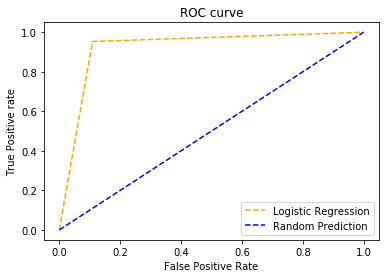

In [51]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.plot(fpr, tpr, linestyle='--', color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue', label='Random Prediction')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

# References <a id="section9"/>

1. Complete Machine Learning Package, Jean de Dieu Nyandwi, available at: [https://github.com/Nyandwi/machine_learning_complete](https://github.com/Nyandwi/machine_learning_complete).
2. Python Data Science Handbook, Jake VanderPlas available at: [https://github.com/jakevdp/PythonDataScienceHandbook](https://github.com/jakevdp/PythonDataScienceHandbook).
3. Python Machine Learning (2nd Ed.) Code Repository, Sebastian Raschka, available at: [https://github.com/rasbt/python-machine-learning-book-2nd-edition](https://github.com/rasbt/python-machine-learning-book-2nd-edition). 
4. Advanced Python for Data Science, University of Cincinnati, available at: [https://github.com/uc-python/advanced-python-datasci](https://github.com/uc-python/advanced-python-datasci).


[BACK TO TOP](#section0)